# Load Library

In [90]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re
import random
import statistics
import math
from collections import Counter

#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load Data

In [91]:
file_path_csv = "Seton COVID Cohort Dataset Share SDH/covid_pts_enc_level_labs_dx_2021-02-02_deid.csv"
file_path_csv_extra = "Seton COVID Cohort Dataset Share SDH/meds_admin_for_SOFA_COVID_cohort_SDH_share.csv"

# Read csv as a dataframe from the path
df = pd.read_csv(file_path_csv, index_col=False)
df_extra = pd.read_csv(file_path_csv_extra, index_col=False)

# Exploratory Data Anlaysis (EDA)

## Main data

In [92]:
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   admit_dt_tm                    2469 non-null   object 
 1   discharge_dt_tm                2384 non-null   object 
 2   facility                       2469 non-null   object 
 3   encounter_type_display         2469 non-null   object 
 4   age_at_admit                   2469 non-null   int64  
 5   gender                         2469 non-null   object 
 6   zip_cust_table                 2469 non-null   object 
 7   ethnicity_display              2469 non-null   object 
 8   race_display                   2469 non-null   object 
 9   race_eth_comb                  2445 non-null   object 
 10  length_of_stay                 2384 non-null   float64
 11  icd_prim                       2328 non-null   object 
 12  deceased_dt_tm                 216 non-null    o

None

,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,White,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,4dMaH,61003,10650
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,White,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,False,False,False,False,False,False,False,False,3.0,8wQnr,84969,27818
2,2020-03-25 13:25:00,2020-03-30 03:48:00,Medical Center,IP Private/Semi Private room,80,Female,78758,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,4.58,A41.89,3/30/2020 3:48,Expired,Expired,Insured,Emergency room,Ambulance,NaN,NaN,NaN,NaN,NaN,NaN,Not employed,Not employed,Not employed,1.2,1.8,18,87.0,0.2,NaN,77.0,90.100,NaN,11.0,12.4,Nasal cannula,NaN,556.0,130.1,NaN,20.0,110.0,0.2,14.3,4.0,Unknown if ever smoked,AMS,NaN,NaN,NaN,NaN,125.0,NaN,NaN,False,False,False,True,False,True,True,True,False,1.0,6YGuu,69112,34412
3,2020-03-25 13:36:00,2020-03-27 13:15:00,Medical Center,IP Private/Semi Private room,56,Male,78746,Not Hispanic or Latino,White,White Non Hispanic,2.00,R19.7,NaN,Home,Home,Insured,Emergency room,Private Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,Chef,Restaurant,Employed,0.9,0.9,31,30.0,0.9,<200,89.0,84.368,NaN,15.0,10.6,Room air,92.0,193.0,NaN,0.04,38.0,144.0,NaN,8.2,2.0,Never smoker,diarrhea,70.0,107.3,NaN,NaN,86.0,38.4,26.687783,False,False,False,False,False,False,False,False,False,1.0,P1Tjg,84820,37981
4,2020-03-25 13:43:00,2020-03-27 12:44:00,Medical Center,IP Private/Semi Private room,46,Female,78757,Not Hispanic or Latino,White,White Non Hispanic,1.96,J12.89,NaN,Home,Home,Insured,Emergency room,Private Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,Newspaper,Other,Employed,0.8,1.7,25,37.0,0.7,NaN,78.0,99.500,NaN,15.0,33.2,Room air,95.0,184.0,NaN,0.04,18.0,117.0,NaN,5.1,NaN,Never smoker,poss covid asthma,66.0,91.0,NaN,NaN,82.0,37.3,35.410000,False,False,True,False,False,False,False,False,False,0.0,iouKO,76686,41152


In [93]:
len(df.loc[df['vent_hours_summed'].notnull()&df['icu_hours_summed'].isnull()])

8

## Extra data

In [94]:
display(df_extra.info())
df_extra.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33892 entries, 0 to 33891
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   medication_name       33892 non-null  object 
 1   dose_of_medication    33892 non-null  object 
 2   administration_dt_tm  33892 non-null  object 
 3   SOFA                  0 non-null      float64
 4   deid_fin_encounter    33892 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ MB


None

,medication_name,dose_of_medication,administration_dt_tm,SOFA,deid_fin_encounter
0,norepinephrine,0.030122 mg,2020-08-03T09:59:59.000-05:00,NaN,35541
1,norepinephrine,0.11296 mg,2020-08-02T23:59:59.000-05:00,NaN,35541
2,norepinephrine,0.077088 mg,2020-08-02T22:59:59.000-05:00,NaN,35541
3,norepinephrine,mcg/kg/min,2020-08-03T09:15:00.000-05:00,NaN,35541
4,norepinephrine,0.080864 mg,2020-08-03T05:59:59.000-05:00,NaN,35541


In [95]:
'''
Extract only rows containing 'mcg/kg/min'.
Remove 'mcg/kg/min' in string and convert the numeric values into float.
'''

df_extra = df_extra.loc[df_extra['dose_of_medication'].str.contains('mcg/kg/min')]
df_extra['dose_of_medication'] = df_extra['dose_of_medication'].apply(lambda x: re.sub('mcg/kg/min', '0', x))
df_extra['dose_of_medication'] = df_extra['dose_of_medication'].apply(lambda x: re.sub('\ .*','', x))
df_extra['dose_of_medication'] = df_extra['dose_of_medication'].astype(float)
df_extra

,medication_name,dose_of_medication,administration_dt_tm,SOFA,deid_fin_encounter
3,norepinephrine,0.00,2020-08-03T09:15:00.000-05:00,NaN,35541
5,norepinephrine,0.03,2020-08-02T22:57:00.000-05:00,NaN,35541
6,norepinephrine,0.03,2020-08-03T09:00:00.000-05:00,NaN,35541
7,norepinephrine,0.01,2020-08-03T06:35:00.000-05:00,NaN,35541
9,norepinephrine,0.03,2020-08-03T06:15:00.000-05:00,NaN,35541
...,...,...,...,...,...
33866,norepinephrine,0.02,2020-11-28T17:30:00.000-06:00,NaN,11754
33883,norepinephrine,0.05,2020-11-29T10:00:00.000-06:00,NaN,11754
33885,norepinephrine,0.03,2020-11-29T11:00:00.000-06:00,NaN,11754
33888,norepinephrine,0.02,2020-11-29T13:34:00.000-06:00,NaN,11754


In [96]:
'''
Extract only rows including the maximum values in 'dose_of_medication' for each encounter.
'''

df_extra = df_extra.groupby(['medication_name', 'deid_fin_encounter']).max().reset_index()

print(df_extra.shape)
df_extra.head()

(147, 5)


,medication_name,deid_fin_encounter,dose_of_medication,administration_dt_tm,SOFA
0,dobuTamine,25093,2.50,2020-10-26T13:00:00.000-05:00,NaN
1,dobuTamine,30090,5.00,2020-09-10T12:40:00.000-05:00,NaN
2,dobuTamine,36262,5.00,2020-10-21T15:00:00.000-05:00,NaN
3,dobuTamine,44845,0.75,2020-11-13T00:19:00.000-06:00,NaN
4,dopamine,32723,0.00,2020-11-05T11:56:00.000-06:00,NaN


In [97]:
len(df_sample.loc[df_sample['SOFA']>=11])/len(df_sample)

0.0598159509202454

# Functions

## Calculate SOFA scores

In [98]:
# https://www.mdcalc.com/sequential-organ-failure-assessment-sofa-score
# https://www.mdcalc.com/sequential-organ-failure-assessment-sofa-score#evidence
# https://ccforum.biomedcentral.com/articles/10.1186/s13054-019-2663-7

calibration_sofa_mortality = {
    0: 0.0,
    1: 0.0,
    2: 6.4,
    3: 6.4,
    4: 20.2,
    5: 20.2,
    6: 21.5,
    7: 21.5,
    8: 33.3,
    9: 33.3,
    10: 50.0,
    11: 50.0,
    12: 95.2,
    13: 95.2,
    14: 95.2,
    15: 95.2,
    16: 95.2,
    17: 95.2,
    18: 95.2,
    19: 95.2,
    20: 95.2,
    21: 95.2,
    22: 95.2,
    23: 95.2,
    24: 95.2
}

# Calculate SOFA score for each patient
def calculate_sofa(patient):
    score = 0
    
    #print(patient)
    # 1. Respiratory system: PaO2/FiO2 (mmHg)
    if (patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 300 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 399:
        score += 1 
        
    elif ((patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 200 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 299) or ((patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 199 and patient['vent_hours_summed'] == np.nan):
        score += 2
        
    #elif (patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 100 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 199 and patient['vent_hours_summed'].notnull() == True:
    elif (patient['pO2_Art']/patient['FiO2/Percent'])*100 >= 100 and (patient['pO2_Art']/patient['FiO2/Percent'])*100 <= 199 and patient['vent_hours_summed'] != np.nan:
        score += 3
        
    elif (patient['pO2_Art']/patient['FiO2/Percent'])*100 < 100 and patient['vent_hours_summed'] != np.nan:
        score += 4
        
    # 2. Nervous system: Glasgow Coma Scale
    if patient['Glasgow_Coma_Score'] == 13 or patient['Glasgow_Coma_Score'] == 14:
        score += 1 
        
    elif patient['Glasgow_Coma_Score'] >= 10 and patient['Glasgow_Coma_Score'] <= 12:
        score += 2
        
    elif patient['Glasgow_Coma_Score'] >= 6 and patient['Glasgow_Coma_Score'] <= 9:
        score += 3
        
    elif patient['Glasgow_Coma_Score'] < 6:
        score += 4
    
    # 3. Cardiovascular system: Mean arterial pressure (MAP) OR administration of vasopressors required
    if patient['Mean_Arterial_Pressure'] < 70:
        score += 1 
    
    elif (patient['medication_name']=='dopamine' and patient['dose_of_medication'] <= 5) or (patient['medication_name']=='dobuTamine' and patient['dose_of_medication'] !=np.nan):
        score += 2

    elif (patient['medication_name']=='dopamine' and patient['dose_of_medication'] > 5 and patient['medication_name']=='epinephrine' and patient['dose_of_medication'] <= 0.1)or (patient['medication_name']=='norepinephrine' and patient['dose_of_medication'] <= 0.1):
        score += 3
   
    elif (patient['medication_name']=='dopamine' and patient['dose_of_medication'] > 15 and patient['medication_name']=='epinephrine' and patient['dose_of_medication'] > 0.1) or (patient['medication_name']=='norepinephrine' and patient['dose_of_medication'] > 0.1):
        score += 4

    # 4. Liver: Bilirubin (mg/dl) [μmol/L] 
    if float(patient['Bili_Total']) >= 1.2 and float(patient['Bili_Total']) <= 1.9:
        score += 1 
        
    elif float(patient['Bili_Total']) >= 2.0 and float(patient['Bili_Total']) <= 5.9:
        score += 2
        
    elif float(patient['Bili_Total']) >= 6.0 and float(patient['Bili_Total']) <= 11.9:
        score += 3
        
    elif float(patient['Bili_Total']) >= 12.0:
        score += 4

    # 5. Coagulation: Platelets ×103/ml
    if patient['Platelet'] >= 100 and patient['Platelet'] < 150:
        score += 1 
        
    elif patient['Platelet'] >= 50 and patient['Platelet'] < 100:
        score += 2
        
    elif patient['Platelet'] >= 20 and patient['Platelet'] < 50:
        score += 3
        
    elif patient['Platelet'] < 20:
        score += 4
        
    # 6. Kidneys: Creatinine (mg/dl) [μmol/L]; urine output
    if patient['Creatinine'] >= 1.2 and patient['Creatinine'] <= 1.9:
        score += 1 
        
    elif patient['Creatinine'] >= 2.0 and patient['Creatinine'] <= 3.4:
        score += 2
        
    elif patient['Creatinine'] >= 3.5 and patient['Creatinine'] <= 4.9:
        score += 3
        
    elif patient['Creatinine'] >= 5.0:
        score += 4 
    
    #print(score)
    #patient['SOFA'] = score
    
    return score

## Calculate comorbidity conditions

In [99]:
def count_comorbidity(patient):
    count = 0 
    
    if patient.COPD_com_flag == 1:
        count += 1 
        
    if patient.asthma_com_flag == 1:
        count += 1 
        
    if patient.diabetes_com_flag == 1:
        count += 1 
        
    if patient.hypertension_com_flag == 1:
        count += 1 
        
    if patient.CAD_com_flag == 1:
        count += 1 
        
    if patient.heartfailure_com_flag == 1: 
        count += 1 
        
    if patient.CKD_com_flag == 1:
        count += 1 
        
    if patient.cancer_com_flag == 1:
        count += 1 
        
    return count

## Calculate percentage of deaths for each race

In [100]:
def percentage_death(race):
    count = count_race[race.race] # Number of patients in their racial groups

    return (race.count_death / count) * 100

### Clean up race/ethnicity

In [101]:
ls_race = ['White', 'Black or African American', 'Hispanic or Latino', 'Asian']

def latinx(patient):
    if patient.ethnicity_display == 'Hispanic or Latino' and patient.race_display == 'White':
        return "Hispanic or Latino"
    elif patient.ethnicity_display == 'Not Hispanic or Latino' and patient.race_display == 'White': 
        return "White"
    elif patient.race_display == 'Hispanic':
        return "Hispanic or Latino"
    else:
        return patient.race_display

## Visualize 

In [164]:
def visualize_count_mortality(df, policy):
    df = df.replace(to_replace=[2.0], value=['Observed'])
    x_val = list(df['level'].unique())
    x_val.append(x_val.pop(0))
    sns.catplot(x='level', y='count_death', hue='race', data=df, kind='bar', height=4, aspect=3, order=x_val)
    plt.title('Allocation Scheme ({})'.format(policy))
    plt.xlabel('Scarcity Indicator')
    plt.ylabel('Mortality Count')
    plt.show()
    #sns_plot.savefig("figures_new/count_death_new_york.png")

def visualize_percentage_mortality(df, policy):
    #race_hue_labels = df_sample['race_display'].unique()
    df = df.replace(to_replace=[2.0], value=['Observed'])
    x_val = list(df['level'].unique())
    x_val.append(x_val.pop(0))
    sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', data=df, kind='bar', order=x_val, height=4, aspect=3)
    #sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', hue_order=race_hue_labels, data=df_baseline_new_york, kind='bar', order=x_val, height=4, aspect=3)

    plt.title('Allocation Scheme ({})'.format(policy))
    plt.xlabel('Scarcity Indicator')
    plt.ylabel('Mortality Rate')
    sns_plot._legend.set_title('Race')
    #sns_plot.savefig("figures_new/percentage_death_new_york.png")
    

# Preprocess Data

## Aggregate data

In [102]:
df_agg = df.merge(df_extra, on='deid_fin_encounter', how='left')

print(df_agg.shape)
df_agg.head()

(2501, 74)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,medication_name,dose_of_medication,administration_dt_tm,SOFA
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,White,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,4dMaH,61003,10650,NaN,NaN,NaN,NaN
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,White,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,False,False,False,False,False,False,False,False,3.0,8wQnr,84969,27818,NaN,NaN,NaN,NaN
2,2020-03-25 13:25:00,2020-03-30 03:48:00,Medical Center,IP Private/Semi Private room,80,Female,78758,Not Hispanic or Latino,Black or African American,Other race Non Hispanic,4.58,A41.89,3/30/2020 3:48,Expired,Expired,Insured,Emergency room,Ambulance,NaN,NaN,NaN,NaN,NaN,NaN,Not employed,Not employed,Not employed,1.2,1.8,18,87.0,0.2,NaN,77.0,90.100,NaN,11.0,12.4,Nasal cannula,NaN,556.0,130.1,NaN,20.0,110.0,0.2,14.3,4.0,Unknown if ever smoked,AMS,NaN,NaN,NaN,NaN,125.0,NaN,NaN,False,False,False,True,False,True,True,True,False,1.0,6YGuu,69112,34412,NaN,NaN,NaN,NaN
3,2020-03-25 13:36:00,2020-03-27 13:15:00,Medical Center,IP Private/Semi Private room,56,Male,78746,Not Hispanic or Latino,White,White Non Hispanic,2.00,R19.7,NaN,Home,Home,Insured,Emergency room,Private Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,Chef,Restaurant,Employed,0.9,0.9,31,30.0,0.9,<200,89.0,84.368,NaN,15.0,10.6,Room air,92.0,193.0,NaN,0.04,38.0,144.0,NaN,8.2,2.0,Never smoker,diarrhea,70.0,107.3,NaN,NaN,86.0,38.4,26.687783,False,False,False,False,False,False,False,False,False,1.0,P1Tjg,84820,37981,NaN,NaN,NaN,NaN
4,2020-03-25 13:43:00,2020-03-27 12:44:00,Medical Center,IP Private/Semi Private room,46,Female,78757,Not Hispanic or Latino,White,White Non Hispanic,1.96,J12.89,NaN,Home,Home,Insured,Emergency room,Private Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,Newspaper,Other,Employed,0.8,1.7,25,37.0,0.7,NaN,78.0,99.500,NaN,15.0,33.2,Room air,95.0,184.0,NaN,0.04,18.0,117.0,NaN,5.1,NaN,Never smoker,poss covid asthma,66.0,91.0,NaN,NaN,82.0,37.3,35.410000,False,False,True,False,False,False,False,False,False,0.0,iouKO,76686,41152,NaN,NaN,NaN,NaN


## Create sample

### Filter ICU patients

In [103]:
# Patients who were admitted to ICU, had qSOFA scores, and were in one of racial groups (White, Black or African American, Hispanic or Latino, Asian)
df_icu = df_agg.loc[(df_agg['icu_hours_summed'].notnull())]

display(Counter(df_icu['race_display']))
print(df_icu.shape)
df_icu.head()

Counter({'White': 647,
         'Black or African American': 62,
         'Unknown': 18,
         'American Indian/Alaska Native': 4,
         'Asian': 7,
         'Other Race': 28,
         'Decline to Specify': 4,
         'Hispanic': 1,
         'Native Hawaiian or Other Pacific Islande': 1})

(772, 74)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,medication_name,dose_of_medication,administration_dt_tm,SOFA
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,White,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,4dMaH,61003,10650,NaN,NaN,NaN,NaN
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,White,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,False,False,False,False,False,False,False,False,3.0,8wQnr,84969,27818,NaN,NaN,NaN,NaN
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,12.92,U07.1,NaN,Home,Home,Insured,Emergency room,Private Vehicle,293.02,2020-03-28 11:14:00,2020-04-03 14:31:00,160.17,2020-03-30 20:19:00,2020-04-06 12:29:00,TxDOT,Municipal worker,Employed,0.9,0.8,43,48.0,0.5,599,79.0,123.200,100.0,15.0,6.9,Nasal cannula,94.0,355.0,250.1,0.85,28.0,115.0,0.02,12.1,4.0,NaN,SOB,67.0,91.0,NaN,NaN,99.0,37.4,44.890000,False,False,False,False,False,False,False,False,False,1.0,P9yRo,80030,23744,NaN,NaN,NaN,NaN
11,2020-03-28 18:59:00,2020-06-01 15:15:00,Medical Center,IP ICU,24,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,64.88,U07.1,NaN,Long Term Care Hospital,NaN,Insured,Transfer from a Hospital,NaN,1423.18,2020-03-28 22:09:00,2020-05-27 04:53:00,1559.88,2020-03-28 15:22:00,2020-06-01 15:15:00,Student,Other,Employed,1.5,4.2,69,146.0,0.4,>5250,68.0,116.000,80.0,3.0,10.6,Ventilator,89.0,370.0,56.4,18.92,28.0,102.0,0.07,19.4,50.0,NaN,ECMO,NaN,NaN,Positive,Nasophar. swab,143.0,37.1,34.540000,False,False,False,False,False,False,False,False,False,2.0,23f5M,84794,37705,NaN,NaN,NaN,NaN
17,2020-03-31 14:14:00,2020-04-17 17:20:00,Medical Center,IP ICU,55,Male,78602,Not Hispanic or Latino,White,White Non Hispanic,17.13,U07.1,4/17/2020 14:08,Expired,Expired,Insured,Emergency room,Private Vehicle,327.77,2020-04-07 08:40:00,2020-04-17 15:56:00,336.42,2020-04-03 16:55:00,2020-04-17 17:20:00,Business - Drilling,Business,Employed,1.2,1.0,20,36.0,0.6,224,76.0,90.718,100.0,15.0,11.7,Room air,93.0,199.0,102.6,1.61,20.0,122.0,NaN,4.6,2.0,Never smoker,SOB,71.0,91.3,NaN,NaN,80.0,38.9,27.893795,False,False,True,False,True,False,False,False,False,0.0,mNyVy,84725,15345,NaN,NaN,NaN,NaN


### Filter patients having SOFA score

In [104]:
'''
Extract only rows containing vital data necessary to calculate SOFA score
'''

#['pO2_Art', 'FiO2/Percent', 'Glasgow_Coma_Score', 'Mean_Arterial_Pressure', 'Bili_Total', 'Platelet', 'Creatinine']
'''df_icu = df_icu.loc[df_icu['pO2_Art'].notnull() &
                    df_icu['FiO2/Percent'].notnull() &
                    df_icu['Glasgow_Coma_Score'].notnull() &
                    df_icu['Mean_Arterial_Pressure'].notnull() &
                    df_icu['Bili_Total'].notnull() &
                    df_icu['Platelet'].notnull() &
                    df_icu['Creatinine'].notnull()].reset_index(drop=True)

display(Counter(df_icu['race_display']))
print(df_icu.shape)
df_icu.head()'''

"df_icu = df_icu.loc[df_icu['pO2_Art'].notnull() &\n                    df_icu['FiO2/Percent'].notnull() &\n                    df_icu['Glasgow_Coma_Score'].notnull() &\n                    df_icu['Mean_Arterial_Pressure'].notnull() &\n                    df_icu['Bili_Total'].notnull() &\n                    df_icu['Platelet'].notnull() &\n                    df_icu['Creatinine'].notnull()].reset_index(drop=True)\n\ndisplay(Counter(df_icu['race_display']))\nprint(df_icu.shape)\ndf_icu.head()"

### Add SOFA scores

In [105]:
# for i in range(len(df_icu)):
# df_icu.loc[i, ['SOFA']] = calculate_sofa(df_icu.loc[i])
    
df_icu.loc[:, ['SOFA']] = df_icu.apply(lambda row: calculate_sofa(row), axis=1)
#display(Counter(df_icu['race_display']))
print(df_icu.shape)
df_icu.head()

(772, 74)


/Users/jk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,medication_name,dose_of_medication,administration_dt_tm,SOFA
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,White,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,4dMaH,61003,10650,NaN,NaN,NaN,0
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,White,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,False,False,False,False,False,False,False,False,3.0,8wQnr,84969,27818,NaN,NaN,NaN,11
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,12.92,U07.1,NaN,Home,Home,Insured,Emergency room,Private Vehicle,293.02,2020-03-28 11:14:00,2020-04-03 14:31:00,160.17,2020-03-30 20:19:00,2020-04-06 12:29:00,TxDOT,Municipal worker,Employed,0.9,0.8,43,48.0,0.5,599,79.0,123.200,100.0,15.0,6.9,Nasal cannula,94.0,355.0,250.1,0.85,28.0,115.0,0.02,12.1,4.0,NaN,SOB,67.0,91.0,NaN,NaN,99.0,37.4,44.890000,False,False,False,False,False,False,False,False,False,1.0,P9yRo,80030,23744,NaN,NaN,NaN,2
11,2020-03-28 18:59:00,2020-06-01 15:15:00,Medical Center,IP ICU,24,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,64.88,U07.1,NaN,Long Term Care Hospital,NaN,Insured,Transfer from a Hospital,NaN,1423.18,2020-03-28 22:09:00,2020-05-27 04:53:00,1559.88,2020-03-28 15:22:00,2020-06-01 15:15:00,Student,Other,Employed,1.5,4.2,69,146.0,0.4,>5250,68.0,116.000,80.0,3.0,10.6,Ventilator,89.0,370.0,56.4,18.92,28.0,102.0,0.07,19.4,50.0,NaN,ECMO,NaN,NaN,Positive,Nasophar. swab,143.0,37.1,34.540000,False,False,False,False,False,False,False,False,False,2.0,23f5M,84794,37705,NaN,NaN,NaN,9
17,2020-03-31 14:14:00,2020-04-17 17:20:00,Medical Center,IP ICU,55,Male,78602,Not Hispanic or Latino,White,White Non Hispanic,17.13,U07.1,4/17/2020 14:08,Expired,Expired,Insured,Emergency room,Private Vehicle,327.77,2020-04-07 08:40:00,2020-04-17 15:56:00,336.42,2020-04-03 16:55:00,2020-04-17 17:20:00,Business - Drilling,Business,Employed,1.2,1.0,20,36.0,0.6,224,76.0,90.718,100.0,15.0,11.7,Room air,93.0,199.0,102.6,1.61,20.0,122.0,NaN,4.6,2.0,Never smoker,SOB,71.0,91.3,NaN,NaN,80.0,38.9,27.893795,False,False,True,False,True,False,False,False,False,0.0,mNyVy,84725,15345,NaN,NaN,NaN,4


### Ethnicity/Race
Make a distinction between White and Hispanic/Latino

In [106]:
df_icu.loc[:, ['race_display']] = df_icu.apply(lambda patient: latinx(patient), axis=1)
df_icu = df_icu.loc[df_icu['race_display'].isin(ls_race)]#

#display(Counter(df_icu['race_display']))
print(df_icu.shape)
df_icu.head()

(717, 74)


/Users/jk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,medication_name,dose_of_medication,administration_dt_tm,SOFA
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,Hispanic or Latino,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,NaN,4dMaH,61003,10650,NaN,NaN,NaN,0
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,False,False,False,False,False,False,False,False,3.0,8wQnr,84969,27818,NaN,NaN,NaN,11
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,12.92,U07.1,NaN,Home,Home,Insured,Emergency room,Private Vehicle,293.02,2020-03-28 11:14:00,2020-04-03 14:31:00,160.17,2020-03-30 20:19:00,2020-04-06 12:29:00,TxDOT,Municipal worker,Employed,0.9,0.8,43,48.0,0.5,599,79.0,123.200,100.0,15.0,6.9,Nasal cannula,94.0,355.0,250.1,0.85,28.0,115.0,0.02,12.1,4.0,NaN,SOB,67.0,91.0,NaN,NaN,99.0,37.4,44.890000,False,False,False,False,False,False,False,False,False,1.0,P9yRo,80030,23744,NaN,NaN,NaN,2
11,2020-03-28 18:59:00,2020-06-01 15:15:00,Medical Center,IP ICU,24,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,64.88,U07.1,NaN,Long Term Care Hospital,NaN,Insured,Transfer from a Hospital,NaN,1423.18,2020-03-28 22:09:00,2020-05-27 04:53:00,1559.88,2020-03-28 15:22:00,2020-06-01 15:15:00,Student,Other,Employed,1.5,4.2,69,146.0,0.4,>5250,68.0,116.000,80.0,3.0,10.6,Ventilator,89.0,370.0,56.4,18.92,28.0,102.0,0.07,19.4,50.0,NaN,ECMO,NaN,NaN,Positive,Nasophar. swab,143.0,37.1,34.540000,False,False,False,False,False,False,False,False,False,2.0,23f5M,84794,37705,NaN,NaN,NaN,9
17,2020-03-31 14:14:00,2020-04-17 17:20:00,Medical Center,IP ICU,55,Male,78602,Not Hispanic or Latino,White,White Non Hispanic,17.13,U07.1,4/17/2020 14:08,Expired,Expired,Insured,Emergency room,Private Vehicle,327.77,2020-04-07 08:40:00,2020-04-17 15:56:00,336.42,2020-04-03 16:55:00,2020-04-17 17:20:00,Business - Drilling,Business,Employed,1.2,1.0,20,36.0,0.6,224,76.0,90.718,100.0,15.0,11.7,Room air,93.0,199.0,102.6,1.61,20.0,122.0,NaN,4.6,2.0,Never smoker,SOB,71.0,91.3,NaN,NaN,80.0,38.9,27.893795,False,False,True,False,True,False,False,False,False,0.0,mNyVy,84725,15345,NaN,NaN,NaN,4


### Impute Missing Values

In [107]:
# Fill out the missing values in columns related to comorbodity conditions with 0
cols_comorbidity = ['COPD_com_flag', 'asthma_com_flag', 'diabetes_com_flag',
                    'hypertension_com_flag', 'CAD_com_flag', 'heartfailure_com_flag',
                    'CKD_com_flag', 'cancer_com_flag']

df_icu[cols_comorbidity] = df_icu[cols_comorbidity].fillna(0)
df_icu[cols_comorbidity] = df_icu[cols_comorbidity].astype(int)

display(Counter(df_icu['race_display']))
print(df_icu.shape)
df_icu.head()

Counter({'Hispanic or Latino': 385,
         'White': 263,
         'Black or African American': 62,
         'Asian': 7})

(717, 74)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,medication_name,dose_of_medication,administration_dt_tm,SOFA
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,Hispanic or Latino,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,0,0,0,0,0,NaN,4dMaH,61003,10650,NaN,NaN,NaN,0
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,0,0,0,0,0,0,0,0,3.0,8wQnr,84969,27818,NaN,NaN,NaN,11
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,12.92,U07.1,NaN,Home,Home,Insured,Emergency room,Private Vehicle,293.02,2020-03-28 11:14:00,2020-04-03 14:31:00,160.17,2020-03-30 20:19:00,2020-04-06 12:29:00,TxDOT,Municipal worker,Employed,0.9,0.8,43,48.0,0.5,599,79.0,123.200,100.0,15.0,6.9,Nasal cannula,94.0,355.0,250.1,0.85,28.0,115.0,0.02,12.1,4.0,NaN,SOB,67.0,91.0,NaN,NaN,99.0,37.4,44.890000,False,0,0,0,0,0,0,0,0,1.0,P9yRo,80030,23744,NaN,NaN,NaN,2
11,2020-03-28 18:59:00,2020-06-01 15:15:00,Medical Center,IP ICU,24,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,64.88,U07.1,NaN,Long Term Care Hospital,NaN,Insured,Transfer from a Hospital,NaN,1423.18,2020-03-28 22:09:00,2020-05-27 04:53:00,1559.88,2020-03-28 15:22:00,2020-06-01 15:15:00,Student,Other,Employed,1.5,4.2,69,146.0,0.4,>5250,68.0,116.000,80.0,3.0,10.6,Ventilator,89.0,370.0,56.4,18.92,28.0,102.0,0.07,19.4,50.0,NaN,ECMO,NaN,NaN,Positive,Nasophar. swab,143.0,37.1,34.540000,False,0,0,0,0,0,0,0,0,2.0,23f5M,84794,37705,NaN,NaN,NaN,9
17,2020-03-31 14:14:00,2020-04-17 17:20:00,Medical Center,IP ICU,55,Male,78602,Not Hispanic or Latino,White,White Non Hispanic,17.13,U07.1,4/17/2020 14:08,Expired,Expired,Insured,Emergency room,Private Vehicle,327.77,2020-04-07 08:40:00,2020-04-17 15:56:00,336.42,2020-04-03 16:55:00,2020-04-17 17:20:00,Business - Drilling,Business,Employed,1.2,1.0,20,36.0,0.6,224,76.0,90.718,100.0,15.0,11.7,Room air,93.0,199.0,102.6,1.61,20.0,122.0,NaN,4.6,2.0,Never smoker,SOB,71.0,91.3,NaN,NaN,80.0,38.9,27.893795,False,0,1,0,1,0,0,0,0,0.0,mNyVy,84725,15345,NaN,NaN,NaN,4


### Add comobitidy count

In [108]:
df_icu['count_comorbidity'] = df_icu.apply(lambda patient: count_comorbidity(patient), axis=1)
df_icu['has_comorbidity'] = df_icu['count_comorbidity'].apply(lambda count: 1 if count >= 1 else 0)

display(Counter(df_icu['race_display']))
print(df_icu.shape)
df_icu.head()

Counter({'Hispanic or Latino': 385,
         'White': 263,
         'Black or African American': 62,
         'Asian': 7})

(717, 76)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,medication_name,dose_of_medication,administration_dt_tm,SOFA,count_comorbidity,has_comorbidity
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,Hispanic or Latino,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,0,0,0,0,0,NaN,4dMaH,61003,10650,NaN,NaN,NaN,0,0,0
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,0,0,0,0,0,0,0,0,3.0,8wQnr,84969,27818,NaN,NaN,NaN,11,0,0
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,12.92,U07.1,NaN,Home,Home,Insured,Emergency room,Private Vehicle,293.02,2020-03-28 11:14:00,2020-04-03 14:31:00,160.17,2020-03-30 20:19:00,2020-04-06 12:29:00,TxDOT,Municipal worker,Employed,0.9,0.8,43,48.0,0.5,599,79.0,123.200,100.0,15.0,6.9,Nasal cannula,94.0,355.0,250.1,0.85,28.0,115.0,0.02,12.1,4.0,NaN,SOB,67.0,91.0,NaN,NaN,99.0,37.4,44.890000,False,0,0,0,0,0,0,0,0,1.0,P9yRo,80030,23744,NaN,NaN,NaN,2,0,0
11,2020-03-28 18:59:00,2020-06-01 15:15:00,Medical Center,IP ICU,24,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,64.88,U07.1,NaN,Long Term Care Hospital,NaN,Insured,Transfer from a Hospital,NaN,1423.18,2020-03-28 22:09:00,2020-05-27 04:53:00,1559.88,2020-03-28 15:22:00,2020-06-01 15:15:00,Student,Other,Employed,1.5,4.2,69,146.0,0.4,>5250,68.0,116.000,80.0,3.0,10.6,Ventilator,89.0,370.0,56.4,18.92,28.0,102.0,0.07,19.4,50.0,NaN,ECMO,NaN,NaN,Positive,Nasophar. swab,143.0,37.1,34.540000,False,0,0,0,0,0,0,0,0,2.0,23f5M,84794,37705,NaN,NaN,NaN,9,0,0
17,2020-03-31 14:14:00,2020-04-17 17:20:00,Medical Center,IP ICU,55,Male,78602,Not Hispanic or Latino,White,White Non Hispanic,17.13,U07.1,4/17/2020 14:08,Expired,Expired,Insured,Emergency room,Private Vehicle,327.77,2020-04-07 08:40:00,2020-04-17 15:56:00,336.42,2020-04-03 16:55:00,2020-04-17 17:20:00,Business - Drilling,Business,Employed,1.2,1.0,20,36.0,0.6,224,76.0,90.718,100.0,15.0,11.7,Room air,93.0,199.0,102.6,1.61,20.0,122.0,NaN,4.6,2.0,Never smoker,SOB,71.0,91.3,NaN,NaN,80.0,38.9,27.893795,False,0,1,0,1,0,0,0,0,0.0,mNyVy,84725,15345,NaN,NaN,NaN,4,2,1


### Add life years

In [109]:
df_icu['life_years'] = df_icu['age_at_admit'].apply(lambda age: 100 - age)

display(Counter(df_icu['race_display']))
print(df_icu.shape)
df_icu.head()

Counter({'Hispanic or Latino': 385,
         'White': 263,
         'Black or African American': 62,
         'Asian': 7})

(717, 77)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,medication_name,dose_of_medication,administration_dt_tm,SOFA,count_comorbidity,has_comorbidity,life_years
0,2020-08-25 20:51:00,2020-09-01 14:30:00,Shoal Creek,IP Private/Semi Private room,49,Male,Unknown,Hispanic or Latino,Hispanic or Latino,White Hispanic,6.75,NaN,NaN,Home,Home,Unknown,Transfer from a Hospital,NaN,NaN,NaN,NaN,36.55,2020-08-25 20:53:00,2020-08-27 09:26:00,NaN,Not yet chart searched,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,0,0,0,0,0,0,0,NaN,4dMaH,61003,10650,NaN,NaN,NaN,0,0,0,51
1,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.0,94,253.0,3.1,>5250,21.0,99.200,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.620000,False,0,0,0,0,0,0,0,0,3.0,8wQnr,84969,27818,NaN,NaN,NaN,11,0,0,56
6,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,12.92,U07.1,NaN,Home,Home,Insured,Emergency room,Private Vehicle,293.02,2020-03-28 11:14:00,2020-04-03 14:31:00,160.17,2020-03-30 20:19:00,2020-04-06 12:29:00,TxDOT,Municipal worker,Employed,0.9,0.8,43,48.0,0.5,599,79.0,123.200,100.0,15.0,6.9,Nasal cannula,94.0,355.0,250.1,0.85,28.0,115.0,0.02,12.1,4.0,NaN,SOB,67.0,91.0,NaN,NaN,99.0,37.4,44.890000,False,0,0,0,0,0,0,0,0,1.0,P9yRo,80030,23744,NaN,NaN,NaN,2,0,0,51
11,2020-03-28 18:59:00,2020-06-01 15:15:00,Medical Center,IP ICU,24,Male,78753,Not Hispanic or Latino,White,White Non Hispanic,64.88,U07.1,NaN,Long Term Care Hospital,NaN,Insured,Transfer from a Hospital,NaN,1423.18,2020-03-28 22:09:00,2020-05-27 04:53:00,1559.88,2020-03-28 15:22:00,2020-06-01 15:15:00,Student,Other,Employed,1.5,4.2,69,146.0,0.4,>5250,68.0,116.000,80.0,3.0,10.6,Ventilator,89.0,370.0,56.4,18.92,28.0,102.0,0.07,19.4,50.0,NaN,ECMO,NaN,NaN,Positive,Nasophar. swab,143.0,37.1,34.540000,False,0,0,0,0,0,0,0,0,2.0,23f5M,84794,37705,NaN,NaN,NaN,9,0,0,76
17,2020-03-31 14:14:00,2020-04-17 17:20:00,Medical Center,IP ICU,55,Male,78602,Not Hispanic or Latino,White,White Non Hispanic,17.13,U07.1,4/17/2020 14:08,Expired,Expired,Insured,Emergency room,Private Vehicle,327.77,2020-04-07 08:40:00,2020-04-17 15:56:00,336.42,2020-04-03 16:55:00,2020-04-17 17:20:00,Business - Drilling,Business,Employed,1.2,1.0,20,36.0,0.6,224,76.0,90.718,100.0,15.0,11.7,Room air,93.0,199.0,102.6,1.61,20.0,122.0,NaN,4.6,2.0,Never smoker,SOB,71.0,91.3,NaN,NaN,80.0,38.9,27.893795,False,0,1,0,1,0,0,0,0,0.0,mNyVy,84725,15345,NaN,NaN,NaN,4,2,1,45


### Add zip code

In [110]:
# Merge df_sample with zip_df
df_zip = pd.read_csv('zip_code_data.csv', index_col=False)
df_zip['zip_code'] = df_zip['zip_code'].apply(lambda row: row.strip('ZCTA5 '))
df_icu = pd.merge(df_icu, df_zip, left_on='zip_cust_table', right_on='zip_code', how='inner')
#df_icu.drop(columns=['zip_cust_table'], axis=1, inplace=True)

display(Counter(df_icu['race_display']))
print(df_icu.shape)
df_icu.head()

Counter({'Hispanic or Latino': 358,
         'White': 235,
         'Black or African American': 54,
         'Asian': 5})

(652, 83)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,medication_name,dose_of_medication,administration_dt_tm,SOFA,count_comorbidity,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.00,94,253.0,3.1,>5250,21.0,99.2,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.62,False,0,0,0,0,0,0,0,0,3.0,8wQnr,84969,27818,NaN,NaN,NaN,11,0,0,56,78130,1.5,10,65627,84515,9.5
1,2020-06-21 16:50:00,2020-07-23 16:55:00,Medical Center,IP Private/Semi Private room,71,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,32.00,A41.89,NaN,Rehab Care,Rehab/SNF,Insured,Transfer from a Hospital,NaN,352.62,2020-06-26 16:42:00,2020-07-11 09:19:00,598.51,2020-06-21 12:59:00,2020-07-17 20:09:00,NaN,Not yet chart searched,NaN,2.7,1.60,14,32.0,0.3,372,51.0,80.4,40.0,15.0,7.5,Nasal cannula,97.0,200.0,70.7,0.24,28.0,97.0,1.06,10.3,2.0,NaN,NaN,67.0,73.3,Positive,Nasophar. swab,101.0,37.2,27.76,False,0,0,1,0,0,0,1,0,2.0,Z1U2L,84548,43894,NaN,NaN,NaN,5,2,1,29,78130,1.5,10,65627,84515,9.5
2,2020-07-24 14:45:00,2020-08-03 16:15:00,Medical Center,IP Private/Semi Private room,71,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,10.08,U07.1,NaN,Skilled Nursing Care,Rehab/SNF,Insured,Emergency Dept,Ambulance,NaN,NaN,NaN,21.50,2020-07-24 17:46:00,2020-07-25 15:16:00,NaN,Not yet chart searched,NaN,0.5,2.80,56,46.0,0.4,3318,57.0,80.2,NaN,13.0,30.7,Room air,98.0,604.0,72.5,0.18,20.0,102.0,0.08,9.2,NaN,NaN,COVIDhypotension,NaN,72.0,Positive,Nasophar. swab,98.0,36.9,NaN,False,0,0,1,1,1,0,0,0,1.0,Z1U2L,84548,48974,NaN,NaN,NaN,1,3,1,29,78130,1.5,10,65627,84515,9.5
3,2020-11-19 13:29:00,NaN,Medical Center,IP ICU,47,Female,78130,Unknown,White,White Unknown Ethnicity,NaN,NaN,NaN,Still a patient,Still a patient,Insured,Emergency Dept,Private Vehicle,NaN,NaN,NaN,43.03,2020-11-20 22:58:00,2020-11-22 18:00:00,NaN,Not yet chart searched,NaN,0.8,1.29,32,27.0,0.4,717,86.0,108.2,NaN,15.0,16.9,Room air,86.0,268.0,NaN,NaN,20.0,112.0,<0.01,7.6,2.0,NaN,covid low 02,NaN,94.7,NaN,NaN,98.0,36.7,NaN,False,0,0,0,0,0,0,0,0,0.0,EZ8eh,77973,17000,NaN,NaN,NaN,0,0,0,53,78130,1.5,10,65627,84515,9.5
4,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,12.92,U07.1,NaN,Home,Home,Insured,Emergency room,Private Vehicle,293.02,2020-03-28 11:14:00,2020-04-03 14:31:00,160.17,2020-03-30 20:19:00,2020-04-06 12:29:00,TxDOT,Municipal worker,Employed,0.9,0.80,43,48.0,0.5,599,79.0,123.2,100.0,15.0,6.9,Nasal cannula,94.0,355.0,250.1,0.85,28.0,115.0,0.02,12.1,4.0

### Drop necessary columns

In [111]:
cols_sample = ['age_at_admit', 'gender', 'zip_cust_table', 'median_income', 'poverty_rate', 'ethnicity_display', 'race_display', 'race_eth_comb', 'discharge_disposition_display',
               'insured_uninsured', 'vent_hours_summed', 'icu_hours_summed', 'occupation', 'qSOFA_score', 'SOFA', 'count_comorbidity',
               'has_comorbidity', 'life_years', 'deid_fin_encounter']

df_sample = df_icu[cols_sample].copy()

display(Counter(df_sample['race_display']))
print(df_icu.shape)
df_icu.head()

Counter({'Hispanic or Latino': 358,
         'White': 235,
         'Black or African American': 54,
         'Asian': 5})

(652, 83)


,admit_dt_tm,discharge_dt_tm,facility,encounter_type_display,age_at_admit,gender,zip_cust_table,ethnicity_display,race_display,race_eth_comb,length_of_stay,icd_prim,deceased_dt_tm,discharge_disposition_display,dc_dispo_cat,insured_uninsured,admit_source,arrival_mode,vent_hours_summed,vent_first_order_start_time,vent_last_order_end_time,icu_hours_summed,icu_first_begin_time,icu_last_end_time,occupation,occ_cat,emp_yn,Creatinine,Abs_Lymph,ALT,AST,Bili_Total,D-Dimer,Diastolic_Blood_Pressure,Dosing_Weight_(kg),FiO2/Percent,Glasgow_Coma_Score,Lymph_Auto,Oxygen_Delivery_Method,Oxygen_Saturation,Platelet,pO2_Art,Procalcitonin,Respiratory_Rate,Systolic_Blood_Pressure,Troponin-I,WBC,Oxygen_Flow_Rate,Patient_Smoking_Status,Visit_Reason,Height_(in),Mean_Arterial_Pressure,SARSCOV2,SARSCOV2_Source,heart_pulse_comb,temp_oral_degC,calc_pulled_BMI,no_dx_data,COPD_com_flag,asthma_com_flag,diabetes_com_flag,hypertension_com_flag,CAD_com_flag,heartfailure_com_flag,CKD_com_flag,cancer_com_flag,qSOFA_score,deid_empi_encounter,deid_mrn_encounter,deid_fin_encounter,medication_name,dose_of_medication,administration_dt_tm,SOFA,count_comorbidity,has_comorbidity,life_years,zip_code,male_poverty_rate,female_poverty_rate,median_income,mean_income,poverty_rate
0,2020-03-24 00:07:00,2020-03-26 18:30:00,Medical Center,IP ICU,44,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,2.75,A41.9,3/26/2020 14:10,Expired,Expired,Insured,Transfer from a Hospital,NaN,58.45,2020-03-24 05:55:00,2020-03-26 16:22:00,69.48,2020-03-23 21:01:00,2020-03-26 18:30:00,NaN,Not yet chart searched,NaN,2.9,2.00,94,253.0,3.1,>5250,21.0,99.2,50.0,3.0,5.7,Ventilator,96.0,42.0,470.8,24.53,23.0,36.0,0.73,35.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,30.62,False,0,0,0,0,0,0,0,0,3.0,8wQnr,84969,27818,NaN,NaN,NaN,11,0,0,56,78130,1.5,10,65627,84515,9.5
1,2020-06-21 16:50:00,2020-07-23 16:55:00,Medical Center,IP Private/Semi Private room,71,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,32.00,A41.89,NaN,Rehab Care,Rehab/SNF,Insured,Transfer from a Hospital,NaN,352.62,2020-06-26 16:42:00,2020-07-11 09:19:00,598.51,2020-06-21 12:59:00,2020-07-17 20:09:00,NaN,Not yet chart searched,NaN,2.7,1.60,14,32.0,0.3,372,51.0,80.4,40.0,15.0,7.5,Nasal cannula,97.0,200.0,70.7,0.24,28.0,97.0,1.06,10.3,2.0,NaN,NaN,67.0,73.3,Positive,Nasophar. swab,101.0,37.2,27.76,False,0,0,1,0,0,0,1,0,2.0,Z1U2L,84548,43894,NaN,NaN,NaN,5,2,1,29,78130,1.5,10,65627,84515,9.5
2,2020-07-24 14:45:00,2020-08-03 16:15:00,Medical Center,IP Private/Semi Private room,71,Male,78130,Hispanic or Latino,Hispanic or Latino,White Hispanic,10.08,U07.1,NaN,Skilled Nursing Care,Rehab/SNF,Insured,Emergency Dept,Ambulance,NaN,NaN,NaN,21.50,2020-07-24 17:46:00,2020-07-25 15:16:00,NaN,Not yet chart searched,NaN,0.5,2.80,56,46.0,0.4,3318,57.0,80.2,NaN,13.0,30.7,Room air,98.0,604.0,72.5,0.18,20.0,102.0,0.08,9.2,NaN,NaN,COVIDhypotension,NaN,72.0,Positive,Nasophar. swab,98.0,36.9,NaN,False,0,0,1,1,1,0,0,0,1.0,Z1U2L,84548,48974,NaN,NaN,NaN,1,3,1,29,78130,1.5,10,65627,84515,9.5
3,2020-11-19 13:29:00,NaN,Medical Center,IP ICU,47,Female,78130,Unknown,White,White Unknown Ethnicity,NaN,NaN,NaN,Still a patient,Still a patient,Insured,Emergency Dept,Private Vehicle,NaN,NaN,NaN,43.03,2020-11-20 22:58:00,2020-11-22 18:00:00,NaN,Not yet chart searched,NaN,0.8,1.29,32,27.0,0.4,717,86.0,108.2,NaN,15.0,16.9,Room air,86.0,268.0,NaN,NaN,20.0,112.0,<0.01,7.6,2.0,NaN,covid low 02,NaN,94.7,NaN,NaN,98.0,36.7,NaN,False,0,0,0,0,0,0,0,0,0.0,EZ8eh,77973,17000,NaN,NaN,NaN,0,0,0,53,78130,1.5,10,65627,84515,9.5
4,2020-03-26 15:21:00,2020-04-08 13:15:00,Medical Center,IP Private/Semi Private room,49,Female,78612,Not Hispanic or Latino,White,White Non Hispanic,12.92,U07.1,NaN,Home,Home,Insured,Emergency room,Private Vehicle,293.02,2020-03-28 11:14:00,2020-04-03 14:31:00,160.17,2020-03-30 20:19:00,2020-04-06 12:29:00,TxDOT,Municipal worker,Employed,0.9,0.80,43,48.0,0.5,599,79.0,123.2,100.0,15.0,6.9,Nasal cannula,94.0,355.0,250.1,0.85,28.0,115.0,0.02,12.1,4.0

In [112]:
count_race = Counter(df_sample['race_display'])
count_race

Counter({'Hispanic or Latino': 358,
         'White': 235,
         'Black or African American': 54,
         'Asian': 5})

## Convert data types

In [22]:
# Main data
#df['admit_dt_tm'] = pd.to_datetime(df['admit_dt_tm'])
#df['discharge_dt_tm'] = pd.to_datetime(df['discharge_dt_tm'])

# Extra data
#df_extra['administration_dt_tm'] = pd.to_datetime(df_extra['administration_dt_tm'])

# Calculate Mortality Probability

1. Mortality probabilities corresponding to SOFA scores are calculated within ICU patients in the sample.

In [182]:
len(df_sample.loc[df_sample['discharge_disposition_display']=='Expired'])

131

In [183]:
len(df_sample.loc[df_sample['discharge_disposition_display']!='Expired'])

471

In [ ]:
df_reg_logistic[['SOFA', 'discharge_disposition_display']] = df_reg_logistic[['SOFA', 'discharge_disposition_display']].astype(int)

In [ ]:
df_reg_logistic[['SOFA', 'discharge_disposition_display']].dtypes

qSOFA_score                      int64
discharge_disposition_display    int64
dtype: object

In [ ]:
df_reg_logistic_tmp = df_reg_logistic[['SOFA', 'discharge_disposition_display']].groupby('SOFA').agg(['count', 'sum', 'mean']).reset_index()
df_reg_logistic_tmp.rename(columns={'count': 'count_patient', 'sum': 'count_death', 'mean': 'percentage_death'})

qSOFA_score discharge_disposition_display                             
                              count_patient count_death percentage_death
0         0.0                           161          30         0.186335
1         1.0                           333          55         0.165165
2         2.0                            94          40         0.425532
3         3.0                            14           6         0.428571

In [ ]:
df_reg_logistic[['deid_fin_encounter', 'SOFA', 'discharge_disposition_display']].groupby(['SOFA', 'discharge_disposition_display']).count()
#df_reg_logistic_tmp = df_reg_logistic[['SOFA', 'discharge_disposition_display']].groupby(['SOFA', 'discharge_disposition_display']).agg(['count', 'sum', 'mean']).reset_index()
#df_reg_logistic_tmp.rename(columns={'count': 'count_patient', 'sum': 'count_death', 'mean': 'percentage_death'})

deid_fin_encounter
qSOFA_score discharge_disposition_display                    
0           0                                             131
            1                                              30
1           0                                             278
            1                                              55
2           0                                              54
            1                                              40
3           0                                               8
            1                                               6

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

df_reg_logistic = df_sample.copy()
#df_reg_logistic.loc[df_reg_logistic['discharge_disposition_display']!='Expired', 'discharge_disposition_display'] = 'Not Expired'
df_reg_logistic.loc[df_reg_logistic['discharge_disposition_display']!='Expired', 'discharge_disposition_display'] = 0
df_reg_logistic.loc[df_reg_logistic['discharge_disposition_display']=='Expired', 'discharge_disposition_display'] = 1
df_reg_logistic['discharge_disposition_display'] = df_reg_logistic['discharge_disposition_display'].astype(int)

X = df_reg_logistic[['SOFA']]                        # Dependent variable
y = df_reg_logistic['discharge_disposition_display']       # Independent variable, and it is needed to be preprocessed to make binary category

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

reg_logistic = LogisticRegression()
reg_logistic.fit(X, y)
#reg_logistic.fit(X_train, y_train)
y_pred_prob = reg_logistic.predict_proba(X)
#y_pred_prob = reg_logistic.predict(X_test)
print(y_pred_prob)

#for i in range(len(y_pred_prob)):   # For each patient, assign mortality probabilty
#    df_sample['mortality_prob'] = y_pred_prob[i][1]

#print(df_reg_logistic['mortality_prob'].groupby('SOFA').agg('mean'))    # Display means of mortality probabilities in each SOFA score group
#
#reg_log = sm.Logit(y, X).fit()
#print(reg_log.summary())

[[0.54251046 0.45748954]
 [0.67454042 0.32545958]
 [0.78366157 0.21633843]
 ...
 [0.78366157 0.21633843]
 [0.78366157 0.21633843]
 [0.86359473 0.13640527]]


In [ ]:
len(y_pred_prob)

602

In [ ]:
cnt = 0
for i in range(len(y_pred_prob)):
    
    if y_pred_prob[i][0] > y_pred_prob[i][1]:
        #print(y_pred_prob[i])
        cnt += 1
        
print(cnt)

602


2. Moratlity probabilities corresponding to SOFA scores within the same racial group

In [ ]:
reg_logistic.classes_

array([0, 1])

In [ ]:
for race in col_race:   # Iterate 
    X = df_sample.loc[df_sample['SOFA_score'] & df_sample['race_display']==race]                          # Dependent variable
    y = df_sample.loc[df_sample['discharge_disposition_display'] & df_sample['race_display']==race]       # Independent variable

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

    reg_logistic = LogisticRegression()
    reg_logistic.fit(X, y)
    y_pred_prob = reg_logistic.predict_proba(X)
    print(y_pred_prob)

    for i in range(len(y_pred_prob)):   # For each patient, assign mortality probabilty
        df_sample['mortality_prob'] = y_pred_prob[i][1]

    print(df_sample['mortality_prob'].groupby('SOFA_score').agg('mean'))    # Display means of mortality probabilities in each SOFA score group

    reg_log = sm.Logit(y, X).fit()
    print(reg_log.summary())

3. Mortality probabilities corresponding to a specific subscore, respiratory failure, of SOFA scores

In [ ]:
X = df_sample.loc[df_sample['SOFA_score']=='respiratory']   # Dependent variable: Only respriatory failure
y = df_sample['discharge_disposition_display']              #  Independent variable, and it is needed to be preprocessed to make binary category

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

reg_logistic = LogisticRegression()
reg_logistic.fit(X, y)
y_pred_prob = reg_logistic.predict_proba(X)
print(y_pred_prob)

for i in range(len(y_pred_prob)):   # For each patient, assign mortality probabilty
    df_sample['mortality_prob'] = y_pred_prob[i][1]

print(df_sample['mortality_prob'].groupby('SOFA_score').agg('mean'))    # Display means of mortality probabilities in each SOFA score group

reg_log = sm.Logit(y, X).fit()
print(reg_log.summary())

# Develop allocation

In [113]:
# The number of simulations
iter_simulation = 1000

# Levels of ventilator scarcity
scarcity_indicator_level = np.linspace(0,1,11)
scarcity_indicator_level.round(1)
scarcity_indicator_level

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [114]:
class Allocation(object):
  
    def __init__(self, df, scarcity_level, calibration_sofa_mortality):
        self.patients = df.copy() 
        self.patients['death'] = [0 for _ in range(len(self.patients))]             # All patients are initially set to survive
        self.patients['allocate_vent'] = [0 for _ in range(len(self.patients))]     # All patients are not initially allocated to ventilators  
        self.num_vents = int(len(self.patients) * scarcity_level)                   # Number of ventilators available
        self.model_mortality = calibration_sofa_mortality
        
    def __run_allocation(self, df, flag_simulation):
        df_patients_priotized = df.copy()
        #print('---------------Number of Ventilators available: {}---------------'.format(self.num_vents))
        numOfVent = self.num_vents
        
        for i, patient in df_patients_priotized.iterrows():     # Allocate a patient to ventilator
            if self.num_vents == 0:                             # If no ventialtors available, then stop allocating ventilators
                break
            
            df_patients_priotized.loc[i, 'allocate_vent'] = 1
            self.num_vents -= 1
        
        df_patients_allocated = pd.DataFrame()
        df_patients_allocated_not = pd.DataFrame()
        df_count_death_allocated = pd.DataFrame()
        df_count_death_allocated_not = pd.DataFrame()
        
        if numOfVent != 0:
            df_patients_allocated = df_patients_priotized.loc[df_patients_priotized['allocate_vent']==1].copy()
            df_count_death_allocated = self.mortality_allocated(df_patients_allocated)
        
        if numOfVent != 652:
            df_patients_allocated_not = df_patients_priotized.loc[df_patients_priotized['allocate_vent']==0].copy()
            df_count_death_allocated_not = self.mortality_allocated_not(df_patients_allocated_not)
            #df_patients_allocated_not_adj = self.mortality_allocated_not(df_patients_allocated_not)
        #display(pd.concat([df_count_death_allocated, df_count_death_allocated_not]))
        #display(df_count_death_allocated['sum'].add(df_count_death_allocated_not['sum'], fill_value=0))

        if numOfVent == 0:
            #display(df_count_death_allocated_not['sum'])
            return df_count_death_allocated_not
        elif numOfVent == 652:
            #display(df_count_death_allocated['sum'])
            return df_count_death_allocated
        else:
            #display(df_count_death_allocated.set_index('race_display').add(df_count_death_allocated_not.set_index('race_display'), fill_value=0).reset_index())
            return df_count_death_allocated.set_index('race_display').add(df_count_death_allocated_not.set_index('race_display'), fill_value=0).reset_index()
    
    def mortality_allocated(self, df):
        df_patients_allocated = df.copy()
        
        df_tmp = df_patients_allocated.groupby(['SOFA', 'race_display'])[['deid_fin_encounter']].agg(['count']).copy()
        df_tmp = df_tmp.reset_index(level=['SOFA', 'race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
        
        for i, value in df_tmp.iterrows():
            df_tmp.loc[i, 'expected_death'] = math.ceil(df_tmp.loc[i, 'count']*self.model_mortality[df_tmp.loc[i, 'SOFA']]*0.01)
        
        #print('---------------Patients allocated to ventilators---------------')
        #display(df_tmp)
        #display(df_tmp.groupby('race_display')[['expected_death']].agg(['sum']))
        df_tmp = df_tmp.groupby('race_display')[['expected_death']].agg(['sum']).copy()
        df_tmp = df_tmp.reset_index(level=['race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
        #display(df_tmp)

        return df_tmp
        
    def mortality_allocated_not(self, df): # Mortality for patients not admitted to ventilators
        df_patients_allocated_not = df.copy()

        for i, patient in df.iterrows():
            patient = patient.copy()

            if (pd.notna(patient['vent_hours_summed'])) or patient.discharge_disposition_display == 'Expired':  # A patient did not receive a ventilator in the observed data and the simulation
                df_patients_allocated_not.loc[i, 'death'] = 1
            else:
                df_patients_allocated_not.loc[i, 'death'] = 0
        
        df_tmp = df_patients_allocated_not.groupby(['SOFA', 'race_display'])[['death']].agg(['count']).copy()
        df_tmp = df_tmp.reset_index(level=['SOFA', 'race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)

        #print('---------------Patients NOT allocated to ventilators---------------')
        #display(df_tmp)
        #display(df_tmp.groupby('race_display')[['count']].agg(['sum']))
        df_tmp = df_tmp.groupby('race_display')[['count']].agg(['sum']).copy()
        df_tmp = df_tmp.reset_index(level=['race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)
        #display(df_tmp)
                         
        return df_tmp
    
    def __categorize_age(self, patient):    # Life-cycle consideration delineated in Maryland CSC
        if patient.age_at_admit < 50:
            return 1 
        elif patient.age_at_admit < 70: 
            return 2 
        elif patient.age_at_admit < 85:
            return 3 
        else:
            return 4
    
    '''
    State-level Crisis Standards of Care (CSC)
    '''
    def new_york(self):
        df_patients = self.patients.copy()
        flag_simulation = 0

        # Prioritize patients by shuffling orders within patients having the same qSOFA scores
        groups_sofa = [df for _, df in df_patients.groupby('SOFA')]      # Group patients based on qSOFA scores
        random.shuffle(groups_sofa)                                             # Shuffle patients in each qSOFA score group randomly
        df_prioritized = pd.concat(groups_sofa).reset_index(drop=True)             # Re-combine groups seperated by qSOFA scores
        df_prioritized.sort_values('SOFA', ascending=True, inplace=True)     # Sort patients by qSOFA scores in ascending order
        
        #print(df_prioritized)
        #print(df_prioritized.groupby(['SOFA']).count())
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated
    
    def maryland(self):
        df_patients = self.patients.copy()
        flag_simulation = 0

        # Assign patients into age catetory
        df_patients['cat_age'] = df_patients.apply(lambda patient: self.__categorize_age(patient), axis=1)     # Categorize patients' age
    
        # Prioritize patients who have lower SOFA score first, then small amount of comorbidities, and finally are in youger age category first
        df_patients.sort_values(by=['SOFA', 'count_comorbidity', 'cat_age'], ascending=[True, True, True], inplace=True)
        df_prioritized = df_patients.copy()
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated 
    
    '''
    Non State-level Crisis Standards of Care (CSC)
    '''
    def max_lives_saved(self):
        df_patients = self.patients.copy()
        flag_simulation = 0
        
        # Prioritize patients who have lower SOFA scores first
        df_patients.sort_values(by=['SOFA'], ascending=True, inplace=True)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated 
    
    def max_life_years(self):
        df_patients = self.patients.copy()
        flag_simulation = 0

        # Prioritize patients who have lower SOFA scores and then more life years to live
        df_patients.sort_values(by=['SOFA', 'life_years'], ascending=[True,False], inplace=True)
        df_prioritized = df_patients.copy()

        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated 
    
    def youngest(self):
        df_patients = self.patients.copy()
        flag_simulation = 0
        
        # Prioritize patients who are younger first
        df_patients.sort_values(by=['age_at_admit'], ascending=True, inplace=True)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated 
        
    def sickest(self):
        df_patients = self.patients.copy()
        flag_simulation = 0
        
        # Prioritize patients who have higher SOFA scores first
        df_patients.sort_values(by=['SOFA'], ascending=False, inplace=True)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated
    
    def lottery(self):
        df_patients = self.patients.copy()
        flag_simulation = 1
        
        # Prioritize patients by shuffling them and get a sample including all patients(frac=1)
        df_patients.sample(frac=1)
        df_prioritized = df_patients.copy()
        
        # Allocate ventilators to patients
        df_allocated = self.__run_allocation(df_prioritized, flag_simulation)

        return df_allocated 
        

# Allocate ventilators (Baseline)

In [116]:
death_race_baseline = Counter(df_sample.loc[df_sample['discharge_disposition_display']=='Expired']['race_display'])
pd.DataFrame.from_dict(death_race_baseline, orient='index', columns=['count_death']).reset_index().rename(columns={'index': 'race'})

,race,count_death
0,Hispanic or Latino,87
1,White,46
2,Black or African American,16
3,Asian,3


In [117]:
avg_death_baseline = statistics.mean(death_race_baseline.values())  # Average of deaths for all racial groups
death_race_baseline = pd.DataFrame(death_race_baseline.items(), columns=['race', 'count_death'])
death_race_baseline['level'] = 2.0   # Nothing about scarcity level
death_race_baseline['avg_death'] = avg_death_baseline
death_race_baseline['percentage_death'] = death_race_baseline.apply(lambda row: percentage_death(row), axis=1)  # Ratio of death for each racial group from total deaths
death_race_baseline['type_allocation'] = 'Baseline'
death_race_baseline

,race,count_death,level,avg_death,percentage_death,type_allocation
0,Hispanic or Latino,87,2.0,38,24.301676,Baseline
1,White,46,2.0,38,19.574468,Baseline
2,Black or African American,16,2.0,38,29.629630,Baseline
3,Asian,3,2.0,38,60.000000,Baseline


# Allocate ventilators (Analytical approach)

## New York

In [131]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for level in scarcity_indicator_level:
    
    allocation = Allocation(df_sample, level, calibration_sofa_mortality)  # Generate Allocation object
    df_death = allocation.new_york()                                       # Prioritize patients following Maryland CSC
    #ls_df_alloc_level.append(df_alloc)                                    # Make a list of allocated dataframes for every level of scarcity
    #df_death = df_alloc.loc[df_alloc['death']==1]                         # patients who died after ventilator allocation
    
    # Count of deaths for each racial group in each scarcity level
    #display(df_death)
    #dict_count_death_race = Counter(df_death)
    #display(dict_count_death_race)
    #df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
    #df_count_death_race = df_death.rename(columns={'index': 'race', 0: 'count_death'})
    #df_count_death_race['level'] = round(level, 1)
    df_death.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    df_death['level'] = round(level, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)
    #df_count_death_race['avg_death'] = statistics.mean(dict_count_death_race.values())
    #df_death['avg_death'] = statistics.mean(dict_count_death_race.values())
    #df_count_death_race['percentage_death'] = df_count_death_race.apply(lambda row: percentage_death(row), axis=1)
    #df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)
    
    #ls_dict_count_death_race.append(dict_count_death_race)
    ls_df_count_death_race.append(df_death)

df_new_york = pd.concat(ls_df_count_death_race)
df_new_york['type_allocation'] = 'New York'
df_baseline_new_york = pd.concat([death_race_baseline, df_new_york])
df_baseline_new_york[['count_death', 'avg_death', 'percentage_death']] = df_baseline_new_york[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)
#print('------------------------Final Outcome------------------------')
#display(df_baseline_new_york)

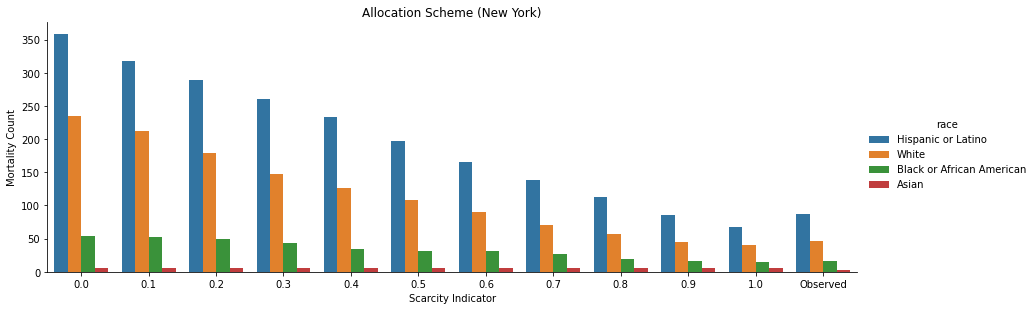

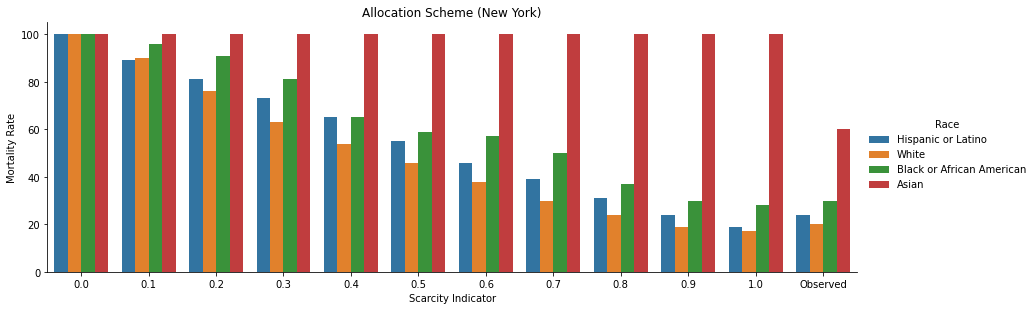

In [165]:
visualize_count_mortality(df_baseline_new_york, 'New York')
visualize_percentage_mortality(df_baseline_new_york, 'New York')

## Maryland

In [141]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for level in scarcity_indicator_level:
  
    allocation = Allocation(df_sample, level, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.maryland()                                         # Prioritize patients following Maryland CSC
    
    #ls_df_alloc_level.append(df_alloc)                                     # Make a list of allocated dataframes for every level of scarcity
    #df_death = df_alloc.loc[df_alloc['death']==1]                          # patients who died after ventilator allocation
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])
    #df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
    #df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
    df_death.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    df_death['level'] = round(level, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)
    #df_count_death_race['avg_death'] = statistics.mean(dict_count_death_race.values())
    #df_count_death_race['percentage_death'] = df_count_death_race.apply(lambda row: percentage_death(row), axis=1)
    
    #ls_dict_count_death_race.append(dict_count_death_race)
    ls_df_count_death_race.append(df_death)

df_maryland = pd.concat(ls_df_count_death_race)
df_maryland['type_allocation'] = 'Maryland'
df_baseline_maryland = pd.concat([death_race_baseline, df_maryland])
df_baseline_maryland[['count_death', 'avg_death', 'percentage_death']] = df_baseline_maryland[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

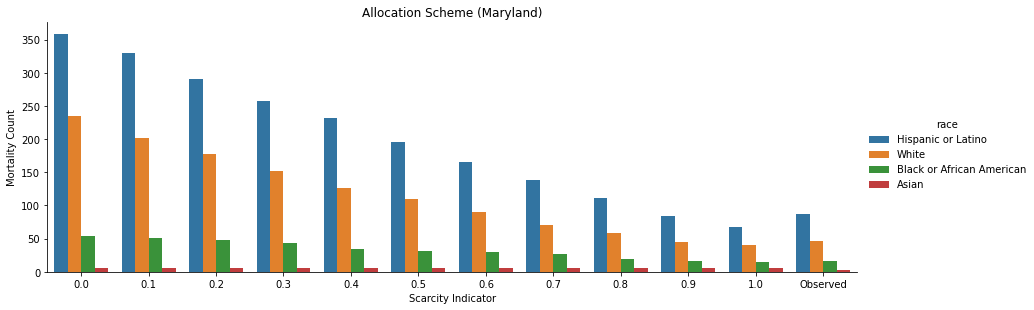

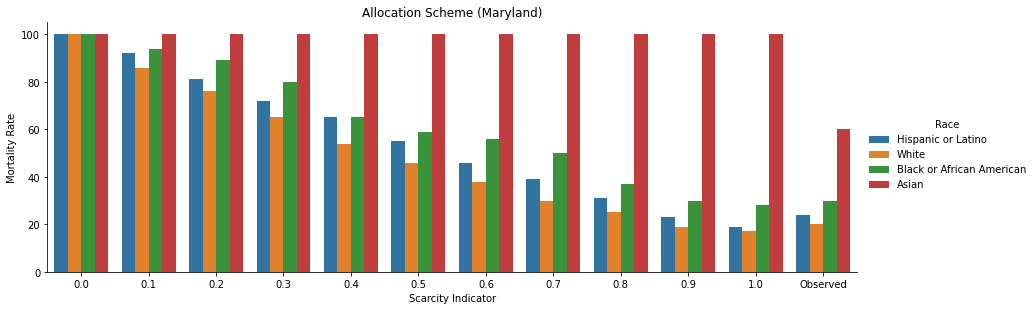

In [166]:
visualize_count_mortality(df_baseline_maryland, 'Maryland')
visualize_percentage_mortality(df_baseline_maryland, 'Maryland')

## Max Lives Years

In [144]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for level in scarcity_indicator_level:
  
    allocation = Allocation(df_sample, level, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.max_life_years()                                         # Prioritize patients following Maryland CSC
    
    #ls_df_alloc_level.append(df_alloc)                                     # Make a list of allocated dataframes for every level of scarcity
    #df_death = df_alloc.loc[df_alloc['death']==1]                          # patients who died after ventilator allocation
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])
    #df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
    #df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
    df_death.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    df_death['level'] = round(level, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)
    #df_count_death_race['avg_death'] = statistics.mean(dict_count_death_race.values())
    #df_count_death_race['percentage_death'] = df_count_death_race.apply(lambda row: percentage_death(row), axis=1)
    
    #ls_dict_count_death_race.append(dict_count_death_race)
    ls_df_count_death_race.append(df_death)

df_max_lives_years = pd.concat(ls_df_count_death_race)
df_max_lives_years['type_allocation'] = 'Max Lives Years'
df_baseline_max_lives_years = pd.concat([death_race_baseline, df_max_lives_years])
df_baseline_max_lives_years[['count_death', 'avg_death', 'percentage_death']] = df_baseline_max_lives_years[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

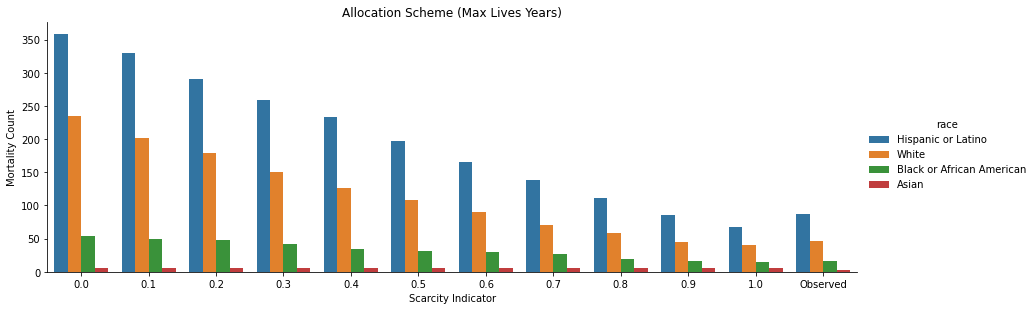

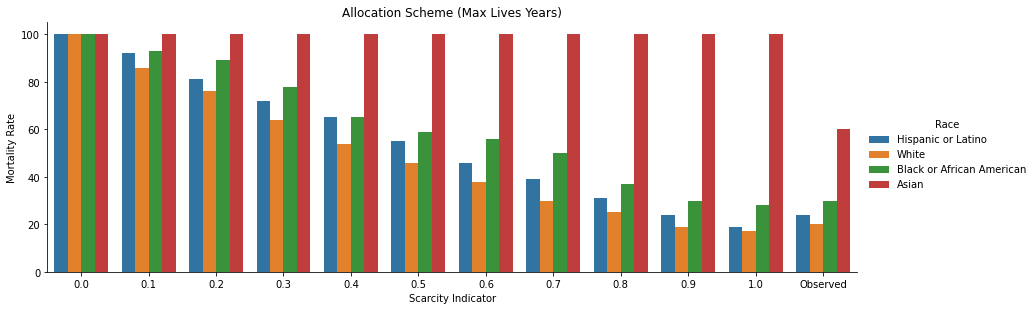

In [167]:
visualize_count_mortality(df_baseline_max_lives_years, 'Max Lives Years')
visualize_percentage_mortality(df_baseline_max_lives_years, 'Max Lives Years')

## Youngest First

In [148]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for level in scarcity_indicator_level:
  
    allocation = Allocation(df_sample, level, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.youngest()                                         # Prioritize patients following Maryland CSC
    
    #ls_df_alloc_level.append(df_alloc)                                     # Make a list of allocated dataframes for every level of scarcity
    #df_death = df_alloc.loc[df_alloc['death']==1]                          # patients who died after ventilator allocation
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])
    #df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
    #df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
    df_death.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    df_death['level'] = round(level, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)
    #df_count_death_race['avg_death'] = statistics.mean(dict_count_death_race.values())
    #df_count_death_race['percentage_death'] = df_count_death_race.apply(lambda row: percentage_death(row), axis=1)
    
    #ls_dict_count_death_race.append(dict_count_death_race)
    ls_df_count_death_race.append(df_death)

df_youngest = pd.concat(ls_df_count_death_race)
df_youngest['type_allocation'] = 'Youngest'
df_baseline_youngest = pd.concat([death_race_baseline, df_youngest])
df_baseline_youngest[['count_death', 'avg_death', 'percentage_death']] = df_baseline_youngest[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)

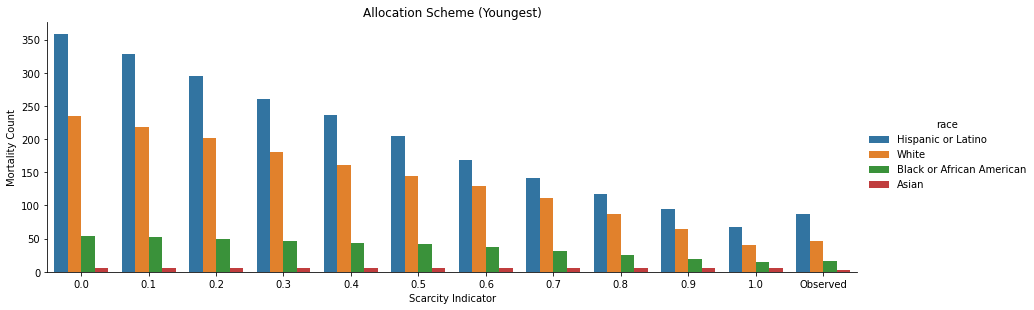

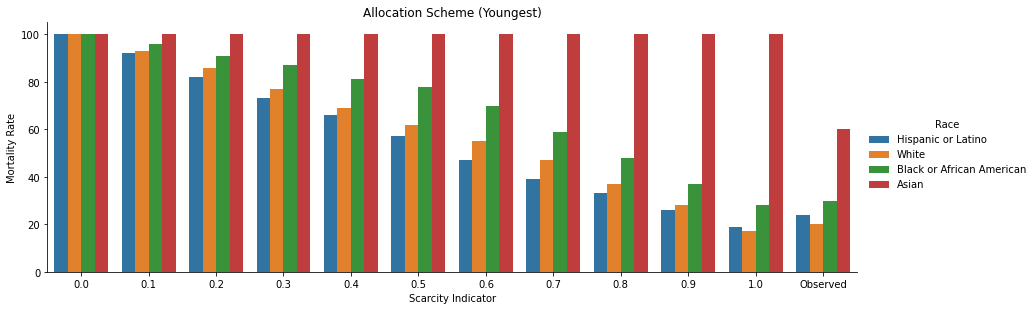

In [168]:
visualize_count_mortality(df_baseline_youngest, 'Youngest')
visualize_percentage_mortality(df_baseline_youngest, 'Youngest')

## Sickest First

In [151]:
ls_df_alloc_level = []          # List of prioritized patients for each scarcity level
ls_df_count_death_race = []

for level in scarcity_indicator_level:
  
    allocation = Allocation(df_sample, level, calibration_sofa_mortality)   # Generate Allocation object
    df_death = allocation.sickest()                                         # Prioritize patients following Maryland CSC
    
    #ls_df_alloc_level.append(df_alloc)                                     # Make a list of allocated dataframes for every level of scarcity
    #df_death = df_alloc.loc[df_alloc['death']==1]                          # patients who died after ventilator allocation
    
    # Count of deaths for each racial group in each scarcity level
    dict_count_death_race = Counter(df_death['race_display'])
    #df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
    #df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
    df_death.rename(columns={'race_display': 'race', 'sum': 'count_death'}, inplace=True)
    df_death['level'] = round(level, 1)
    df_death['avg_death'] = statistics.mean(df_death.loc[: ,'count_death'])
    df_death['percentage_death'] = df_death.apply(lambda row: percentage_death(row), axis=1)
    #df_count_death_race['avg_death'] = statistics.mean(dict_count_death_race.values())
    #df_count_death_race['percentage_death'] = df_count_death_race.apply(lambda row: percentage_death(row), axis=1)
    
    #ls_dict_count_death_race.append(dict_count_death_race)
    ls_df_count_death_race.append(df_death)

df_sickest = pd.concat(ls_df_count_death_race)
df_sickest['type_allocation'] = 'Sickest'
df_baseline_sickest = pd.concat([death_race_baseline, df_sickest])
df_baseline_sickest[['count_death', 'avg_death', 'percentage_death']] = df_baseline_sickest[['count_death', 'avg_death', 'percentage_death']].round(0).astype(int)



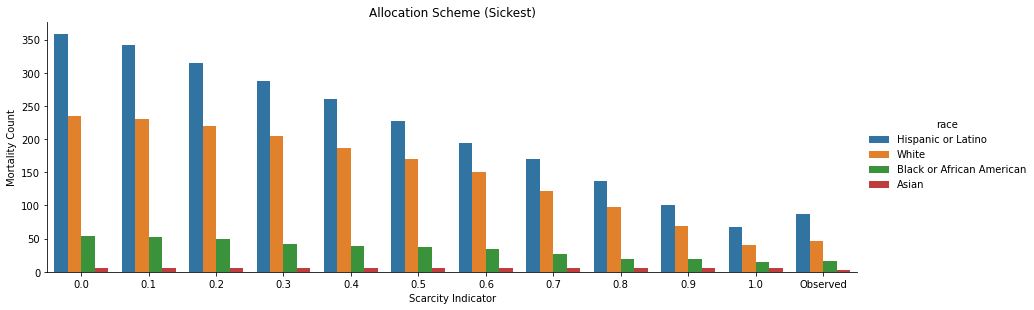

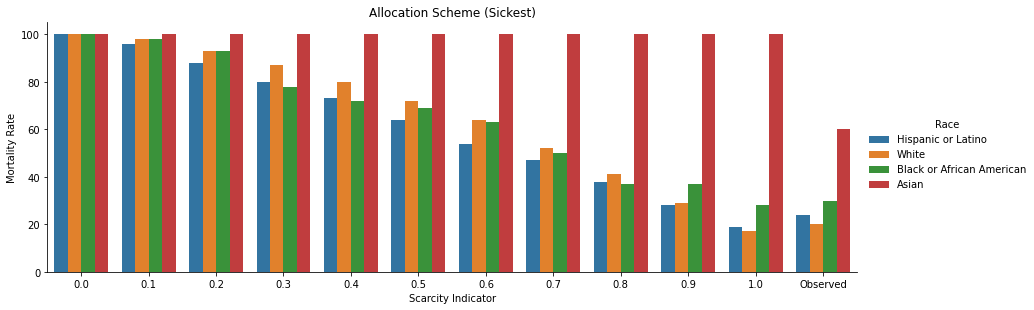

In [169]:
visualize_count_mortality(df_baseline_sickest, 'Sickest')
visualize_percentage_mortality(df_baseline_sickest, 'Sickest')

# Allocate ventilators (Simulation)

## Lottery

In [204]:
ls_df_count_death_race_level = [] # Store dataframes for all scarcity levels
ls_df_count_death_race_level.append(death_race_baseline)

for level in scarcity_indicator_level:
    sum_death = 0                       # Number of deaths 
    ls_df_alloc_iter = []               # Store allocated dataframes within iteration
    ls_df_count_death_race_iter = []    # Store dataframes of racial death counts within iteration
    ls_dict_count_death_race_iter = []  # Store dictionary of racial death counts within iteration

    for _ in range(iter_simulation):    # Iterate 1000 times per scarcity level

        # Allocate ventilators to patients
        allocation = Allocation(df_sample, level, calibration_sofa_mortality)
        df_alloc = allocation.lottery()

        # Examine the number of deaths for each racial group
        ls_df_alloc_iter.append(df_alloc)
        sum_death += df_alloc['death'].sum()
        df_death = df_alloc.loc[df_alloc['death']==1]
        
        # Convert dictionary to dataframe
        dict_count_death_race = Counter(df_death['race_display'])
        df_count_death_race = pd.DataFrame.from_dict(dict_count_death_race, orient='index').reset_index()
        df_count_death_race = df_count_death_race.rename(columns={'index': 'race', 0: 'count_death'})
        
        # List the count of deaths for each racial group
        ls_dict_count_death_race_iter.append(dict_count_death_race)
        ls_df_count_death_race_iter.append(df_count_death_race)
    
    df_count_death_race_level = pd.concat(ls_df_count_death_race_iter)
    df_count_death_race_level['level'] = round(level, 1)
    df_count_death_race_level['percentage_death'] = df_count_death_race_level.apply(lambda row: percentage_death(row), axis=1)
    df_count_death_race_level['avg_death'] = statistics.mean(df_count_death_race_level['count_death'])
    df_count_death_race_level['type_allocation'] = 'Lottery'
    
    ls_df_count_death_race_level.append(df_count_death_race_level)

df_lottery = pd.concat(ls_df_count_death_race_level)
#ls_df_count_death_race_level.append(death_race_baseline)
df_lottery_tmp = pd.concat(ls_df_count_death_race_level)
#all_iters_df.to_csv('sim_results/all_ny.csv'.format(level.round(3)))


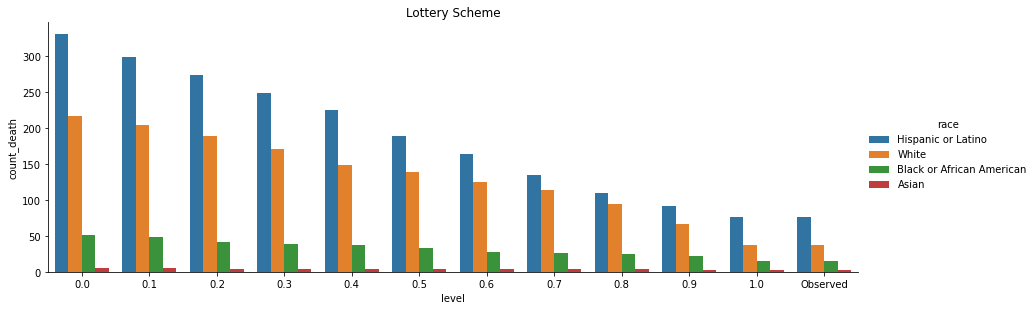

In [205]:
df_lottery_tmp = df_lottery_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_lottery_tmp['level'].unique())
x_val.append(x_val.pop(0))
sns.catplot(x='level', y='count_death', hue='race', data=df_lottery_tmp, kind='bar', order=x_val, height=4, aspect=3)
plt.title('Lottery Scheme')
plt.show()
sns_plot.savefig("figures_new/count_death_lottery.png")

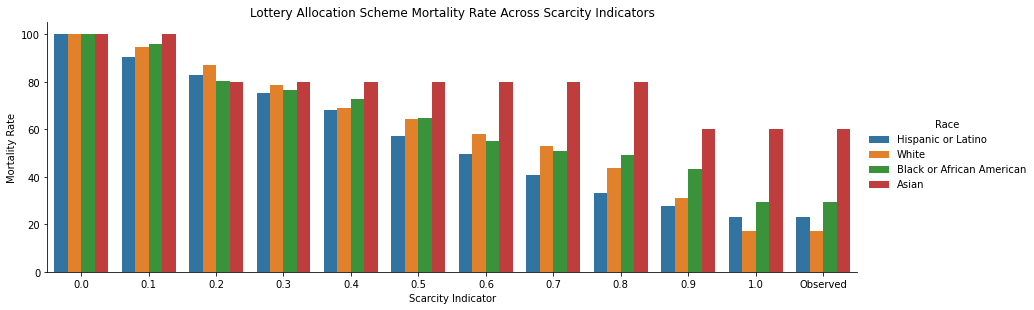

In [206]:
race_hue_labels = df_sample['race_display'].unique()
df_lottery_tmp = df_lottery_tmp.replace(to_replace=[2.0], value=['Observed'])
x_val = list(df_lottery_tmp['level'].unique())
x_val.append(x_val.pop(0))

sns_plot = sns.catplot(x='level', y='percentage_death', hue='race', hue_order=race_hue_labels, data=df_lottery_tmp, kind='bar', order=x_val, height=4, aspect=3)

plt.title('Lottery Allocation Scheme Mortality Rate Across Scarcity Indicators')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Mortality Rate')
sns_plot._legend.set_title('Race')
sns_plot.savefig("figures_new/percentage_death_lottery.png")

# Total 

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.countplot(data=df_enrollments, x='LivingSituation', order=df_enrollments['LivingSituation'].value_counts().index, ax=ax)

In [ ]:
   df_tmp = df_patients_allocated.groupby(['SOFA', 'race_display'])[['deid_fin_encounter']].agg(['count']).copy()
        df_tmp = df_tmp.reset_index(level=['SOFA', 'race_display'], col_level=1)
        df_tmp.columns = df_tmp.columns.droplevel(0)

In [ ]:
g = sns.FacetGrid(df_sample, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

<AxesSubplot:xlabel='SOFA', ylabel='Count'>

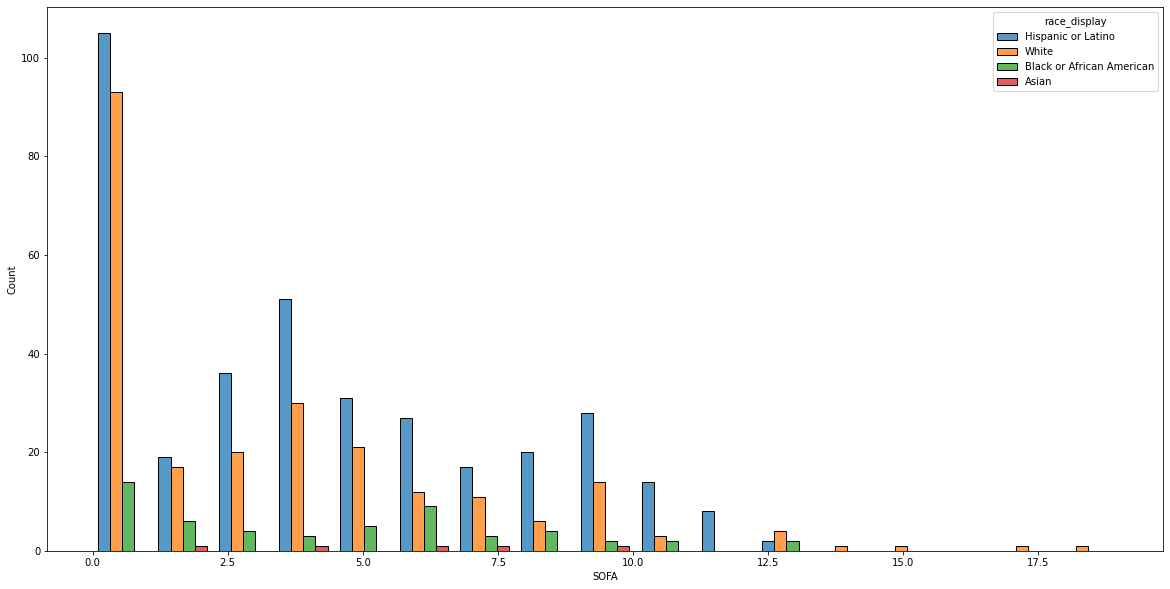

In [74]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(data=df_sample, x='SOFA', hue='race_display', multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='race_display', ylabel='Count'>

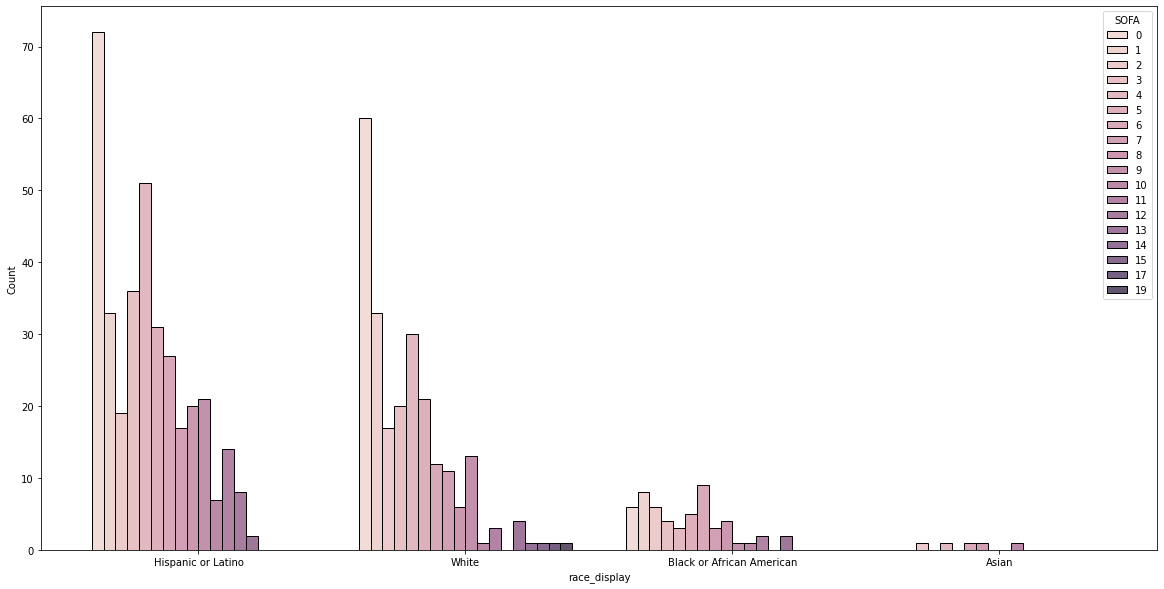

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(data=df_sample, x='race_display', hue='SOFA', multiple="dodge", shrink=.8)

In [207]:
df_csc_all = pd.concat([
    df_new_york[['type_allocation', 'level', 'avg_death']], 
    df_maryland[['type_allocation', 'level', 'avg_death']], 
    df_max_lives_years[['type_allocation', 'level', 'avg_death']], 
    df_youngest[['type_allocation', 'level', 'avg_death']], 
    df_sickest[['type_allocation', 'level', 'avg_death']], 
    df_lottery[['type_allocation', 'level', 'avg_death']], 
])

In [208]:
#df_csc_all.to_csv('total_avg_deaths_data_results.csv', index=False)

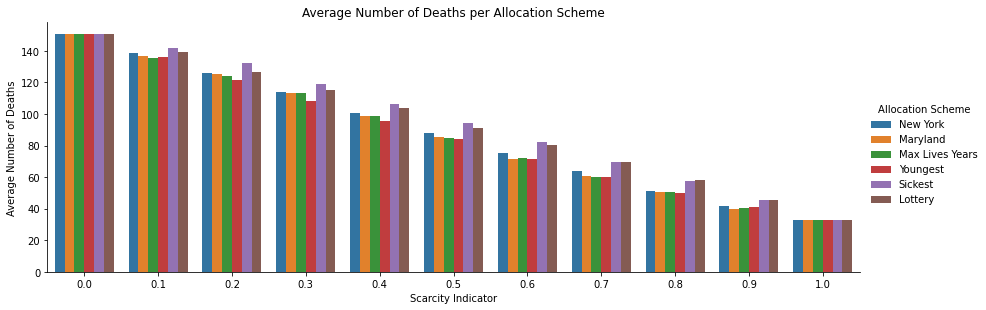

In [209]:
#%matplotlib qt
sns_plot = sns.catplot(x='level', y='avg_death', hue='type_allocation', data=df_csc_all[df_csc_all['level']!=2.0], kind='bar', legend_out=True, height=4, aspect=3)
plt.title('Average Number of Deaths per Allocation Scheme')
sns_plot._legend.set_title('Allocation Scheme')
plt.xlabel('Scarcity Indicator')
plt.ylabel('Average Number of Deaths')
sns_plot.savefig("figures_new/total_average_death.png")